In [1]:
#Eunah's homework!

In [2]:
import pandas as pd 
%matplotlib inline

In [3]:
path = "datas/Eunah_Class5_Data.csv"
data_among_us = pd.read_csv(path)

In [4]:
data_among_us.head()

,note,pizza,drink,call,shower,position
0,Pen and paper,Pepperoni,Beer,Your friend,Your face,On your side
1,Just listen,Funghi,Water,Your partner,Your face,On your side
2,Just listen,Margherita,Water,Your friend,Your face,On your back
3,Pen and paper,Hawaiian,Coke,Your partner,Your hair,On your back
4,Computer,Garden,Water,Your partner,Your face,On your side


In [5]:
data_among_us.columns

Index(['note', 'pizza', 'drink', 'call', 'shower', 'position'], dtype='object')

In [6]:
#how many answers I got in total

len(data_among_us)

14

In [7]:
data_among_us.note.value_counts()
# Q. You are in a python class at CTA. Do you

note
Pen and paper    5
Computer         5
Just listen      4
Name: count, dtype: int64

In [8]:
data_among_us.pizza.value_counts()
# Q. It was a long day. After you came back home, you have decided to just order a pizza for dinner. Which pizza?

pizza
Hawaiian      5
Pepperoni     4
Margherita    2
Garden        2
Funghi        1
Name: count, dtype: int64

In [9]:
data_among_us.drink.value_counts()
# Q. You also want a drink. Which one?

drink
Coke      6
Water     5
Beer      1
Wine      1
Coffee    1
Name: count, dtype: int64

In [9]:
data_among_us.call.value_counts()
# Q. You are waiting for your pizza. You looked at your phone. Someone is calling you and it is exactly who you wanted to talk to. Who is it?

call
Your friend     9
Your partner    5
Name: count, dtype: int64

In [10]:
data_among_us.shower.value_counts()
# Q. After chatting with that person, you got your pizza and the drink, you enjoyed it to your last bite. 
#    Now, it's time to take a shower and go to bed. You are now taking a shower. Where do you wash first?

shower
Your face    5
Your hair    5
Your body    4
Name: count, dtype: int64

In [11]:
data_among_us.position.value_counts()
# Q. Now you are in your bed. What is your most comfortable sleeping position?

position
On your side         9
Hugging something    3
On your back         2
Name: count, dtype: int64

In [11]:
# Finding 1

# Surprisingly, the most common answer for pizza & drink order was Hawaiian & Coke combination.
# I guess this year CTA is banned for entering Italy

import matplotlib.pyplot as plt
import numpy as np

Text(0, 0.5, 'How many')

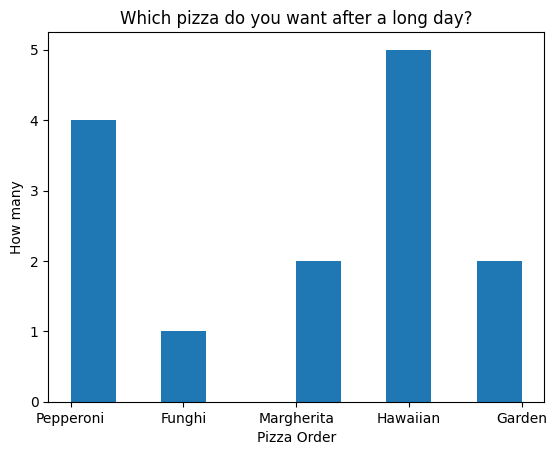

In [12]:
# Most common answer was Hawaiian Pizza

plt.hist(data_among_us.pizza) 
plt.title('Which pizza do you want after a long day?')
plt.xlabel('Pizza Order')
plt.ylabel('How many')

In [13]:
df_pizza = data_among_us.groupby('pizza')
df_pizza_hawaiian = df_pizza.get_group('Hawaiian')
df_pizza_hawaiian

,note,pizza,drink,call,shower,position
3,Pen and paper,Hawaiian,Coke,Your partner,Your hair,On your back
7,Pen and paper,Hawaiian,Coffee,Your friend,Your hair,On your side
8,Pen and paper,Hawaiian,Coke,Your partner,Your hair,Hugging something
12,Just listen,Hawaiian,Coke,Your friend,Your face,Hugging something
13,Just listen,Hawaiian,Coke,Your friend,Your hair,On your side


([<matplotlib.patches.Wedge at 0x220ebd31be0>,
 [Text(-0.8899187180267095, 0.6465637441936395, ''),
  Text(0.9708204526849543, -0.7053422209456772, '')],
 [Text(-0.48541020983275057, 0.3526711331965306, '80.0%'),
  Text(0.56631193073289, -0.4114496288849784, '20.0%')])

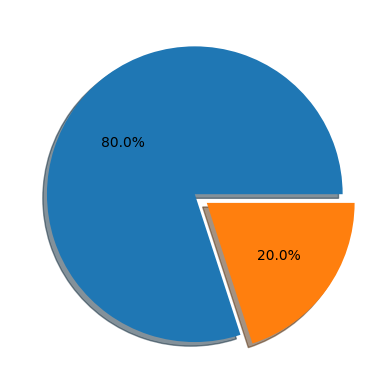

In [14]:
plt.pie(df_pizza_hawaiian.drink.value_counts(), explode = (0, 0.1), shadow = True, autopct='%1.1f%%')
# hatch=['**O', 'oO', 'O.O', '.||.']
# HOW CAN I LABEL THIS ??? -> solved on the next line

<Axes: ylabel='drink'>

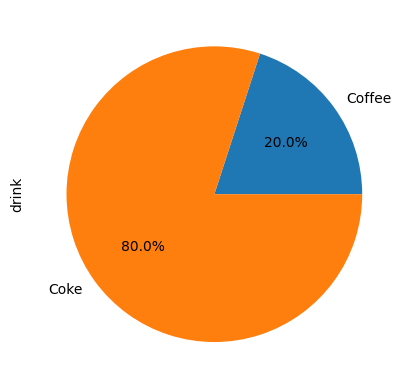

In [16]:
# Most common answer for drink for ppl who chosed Hawaiian Pizza was Coke - full American

df_pizza_hawaiian.groupby("drink")["drink"].count().plot.pie(autopct='%1.1f%%')

In [17]:
# Finding 2

# It seems that ppl who does not take notes during Python class, tends to wash their face first.
# Maybe washing your face helps you remember?


df_just_listen = data_among_us[[ answer for answer in data_among_us.note == 'Just listen']]

In [18]:
df_just_listen

,note,pizza,drink,call,shower,position
1,Just listen,Funghi,Water,Your partner,Your face,On your side
2,Just listen,Margherita,Water,Your friend,Your face,On your back
12,Just listen,Hawaiian,Coke,Your friend,Your face,Hugging something
13,Just listen,Hawaiian,Coke,Your friend,Your hair,On your side


<Axes: ylabel='shower'>

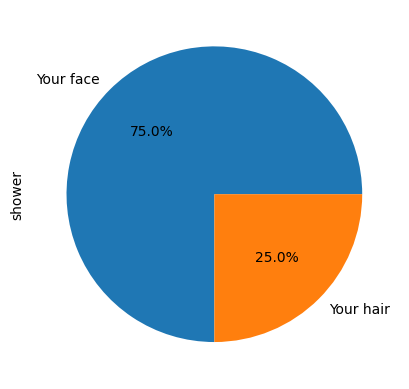

In [20]:
# Most common answer for shower order for ppl who just listen was to wash thier face first!

df_just_listen.groupby("shower")["shower"].count().plot.pie(autopct='%1.1f%%')

In [21]:
# Finding 3

# ppl who prefer thier partner over friends for conversation, do not like pepperoni pizza nor Alchol.
# Maybe they don't need extra spice in thier life as thier relationship is already spicy.


df_partner = data_among_us[[answer for answer in data_among_us.call == 'Your partner']]
df_partner

,note,pizza,drink,call,shower,position
1,Just listen,Funghi,Water,Your partner,Your face,On your side
3,Pen and paper,Hawaiian,Coke,Your partner,Your hair,On your back
4,Computer,Garden,Water,Your partner,Your face,On your side
8,Pen and paper,Hawaiian,Coke,Your partner,Your hair,Hugging something
9,Computer,Garden,Water,Your partner,Your body,On your side


(array([3., 0., 2.]),
 array([3.        , 3.33333333, 3.66666667, 4.        ]),
 <BarContainer object of 3 artists>)

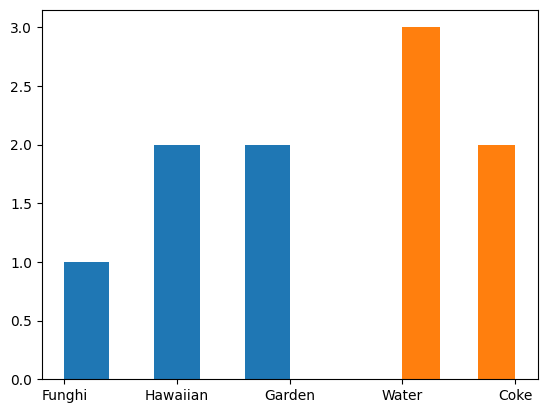

In [24]:
# what ppl who prefers thier partner chosed..

plt.hist(df_partner.pizza, bins = 5)
plt.hist(df_partner.drink, bins = 3)

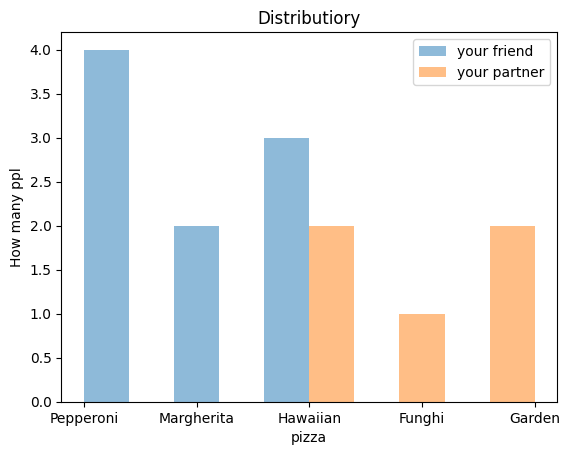

In [35]:
# ppl's pizza order depending on their preference over their friends and partners

df_call = data_among_us.groupby('call')

df_call_friend = df_call.get_group('Your friend')
df_call_partner = df_call.get_group('Your partner')

plt.hist(df_call_friend['pizza'], bins=5, label='your friend', alpha=0.5)
plt.hist(df_call_partner['pizza'], bins=5, label='your partner', alpha=0.5)
plt.xlabel('pizza')
plt.ylabel('How many ppl')
plt.title('Distributiory')
plt.legend()
plt.show()